In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../assets/test_data_auc_ci_plot.csv")
df

,y_prob,y_true
0,0.575991,1.0
1,0.563155,1.0
2,0.514204,1.0
3,0.513137,1.0
4,0.556803,1.0
...,...,...
195,0.508687,1.0
196,0.508670,0.0
197,0.498804,1.0
198,0.495230,0.0


In [2]:
from roc_auc_ci import roc_auc_ci_score

# Example data
y_true = np.array(df.y_true)
y_pred = np.array(df.y_prob)

auc, (lb, ub) = roc_auc_ci_score(y_true, y_pred)
print("This is a statistically valid confidence interval on the AUC using the DeLong method.")
print(f'AUC: {auc:.3f}, 95% CI: ({lb:.3f}, {ub:.3f})')

This is a statistically valid confidence interval on the AUC using the DeLong method.
AUC: 0.776, 95% CI: (0.711, 0.840)


In [3]:
from roc_auc_ci import bootstrap_auc_ci

mean_auc, (ci_lower, ci_upper) = bootstrap_auc_ci(y_true, y_pred)
print(f"Bootstrapped AUC mean: {mean_auc:.3f}, 95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

This gives an empirical confidence interval of the AUC using bootstrapping. It may differ slightly due to randomness.
Bootstrapped AUC mean: 0.775, 95% CI: (0.704, 0.839)


AUC from TPR curves: 0.775
TPR Envelope AUC range: (0.677, 0.863)
TPR Envelope AUC range is not the statistical confidence interval, it's just the area under the lower/upper percentile ROC curves.


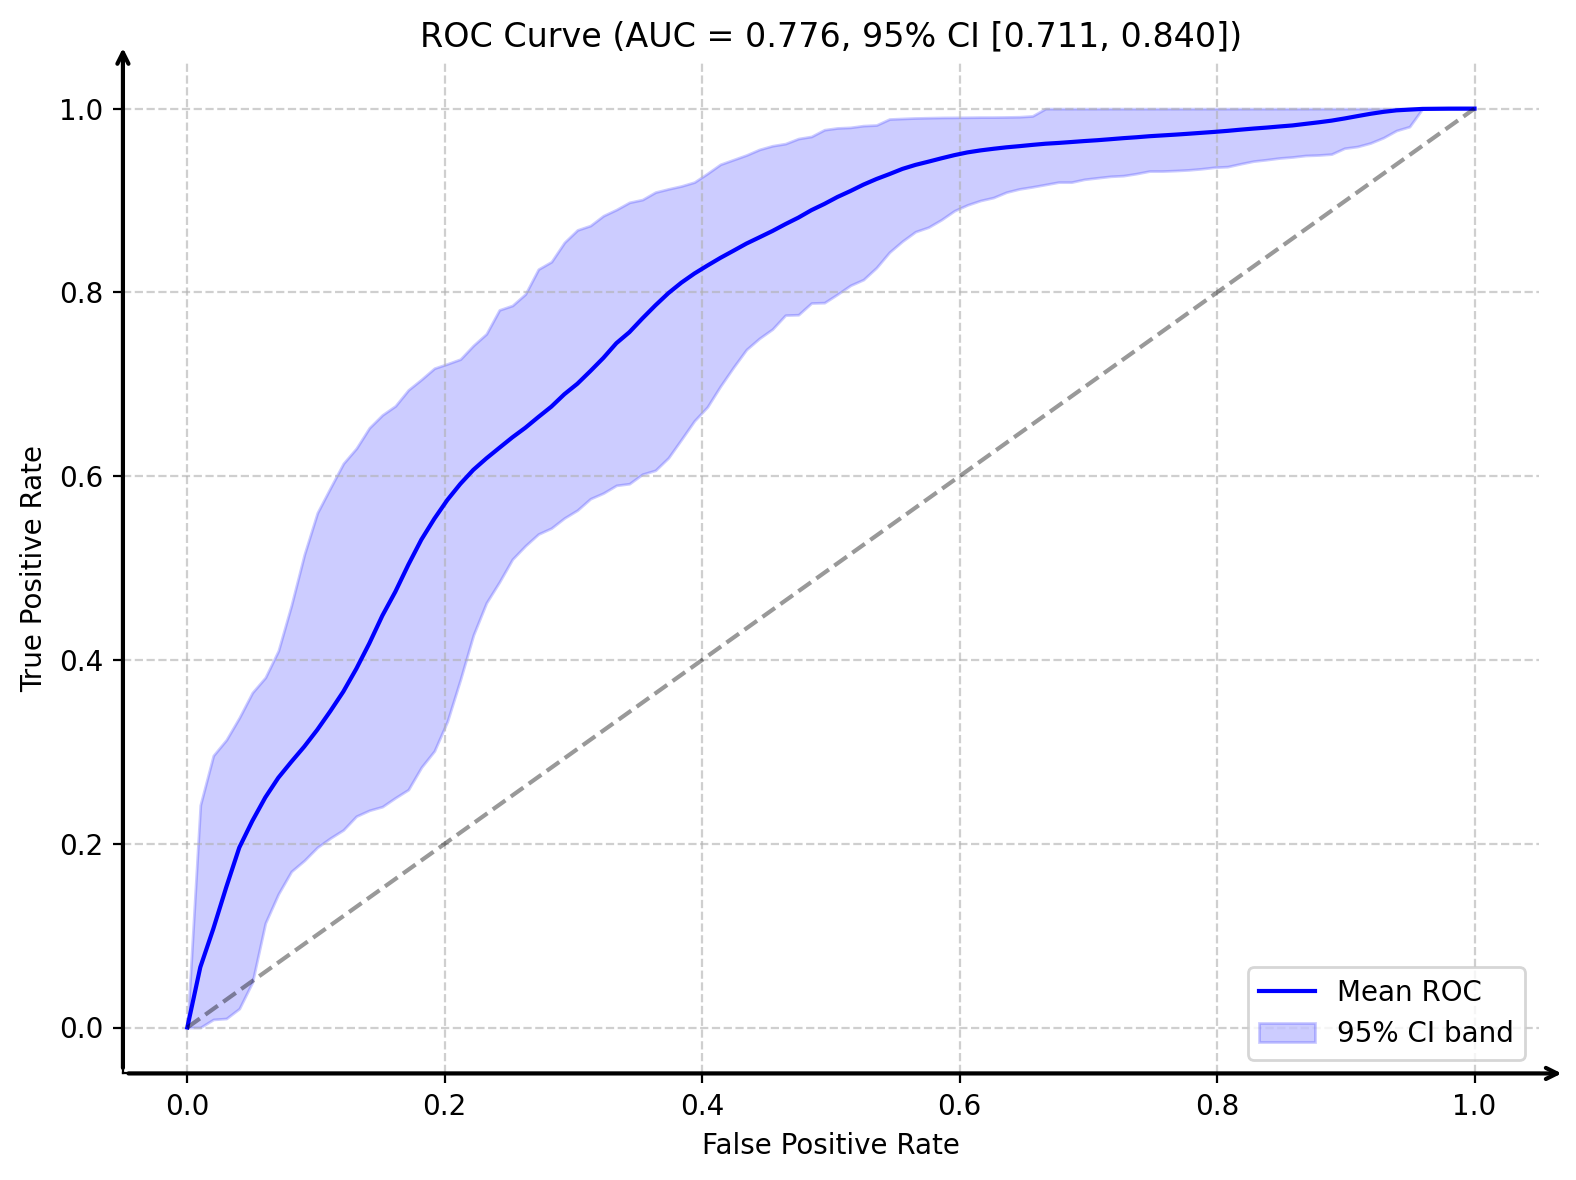

In [4]:
from roc_auc_ci import plot_roc_with_ci

plot_roc_with_ci(y_true, y_pred)

AUC from TPR curves: 0.775
TPR Envelope AUC range: (0.677, 0.863)
TPR Envelope AUC range is not the statistical confidence interval, it's just the area under the lower/upper percentile ROC curves.
Saved to testing_saving.png


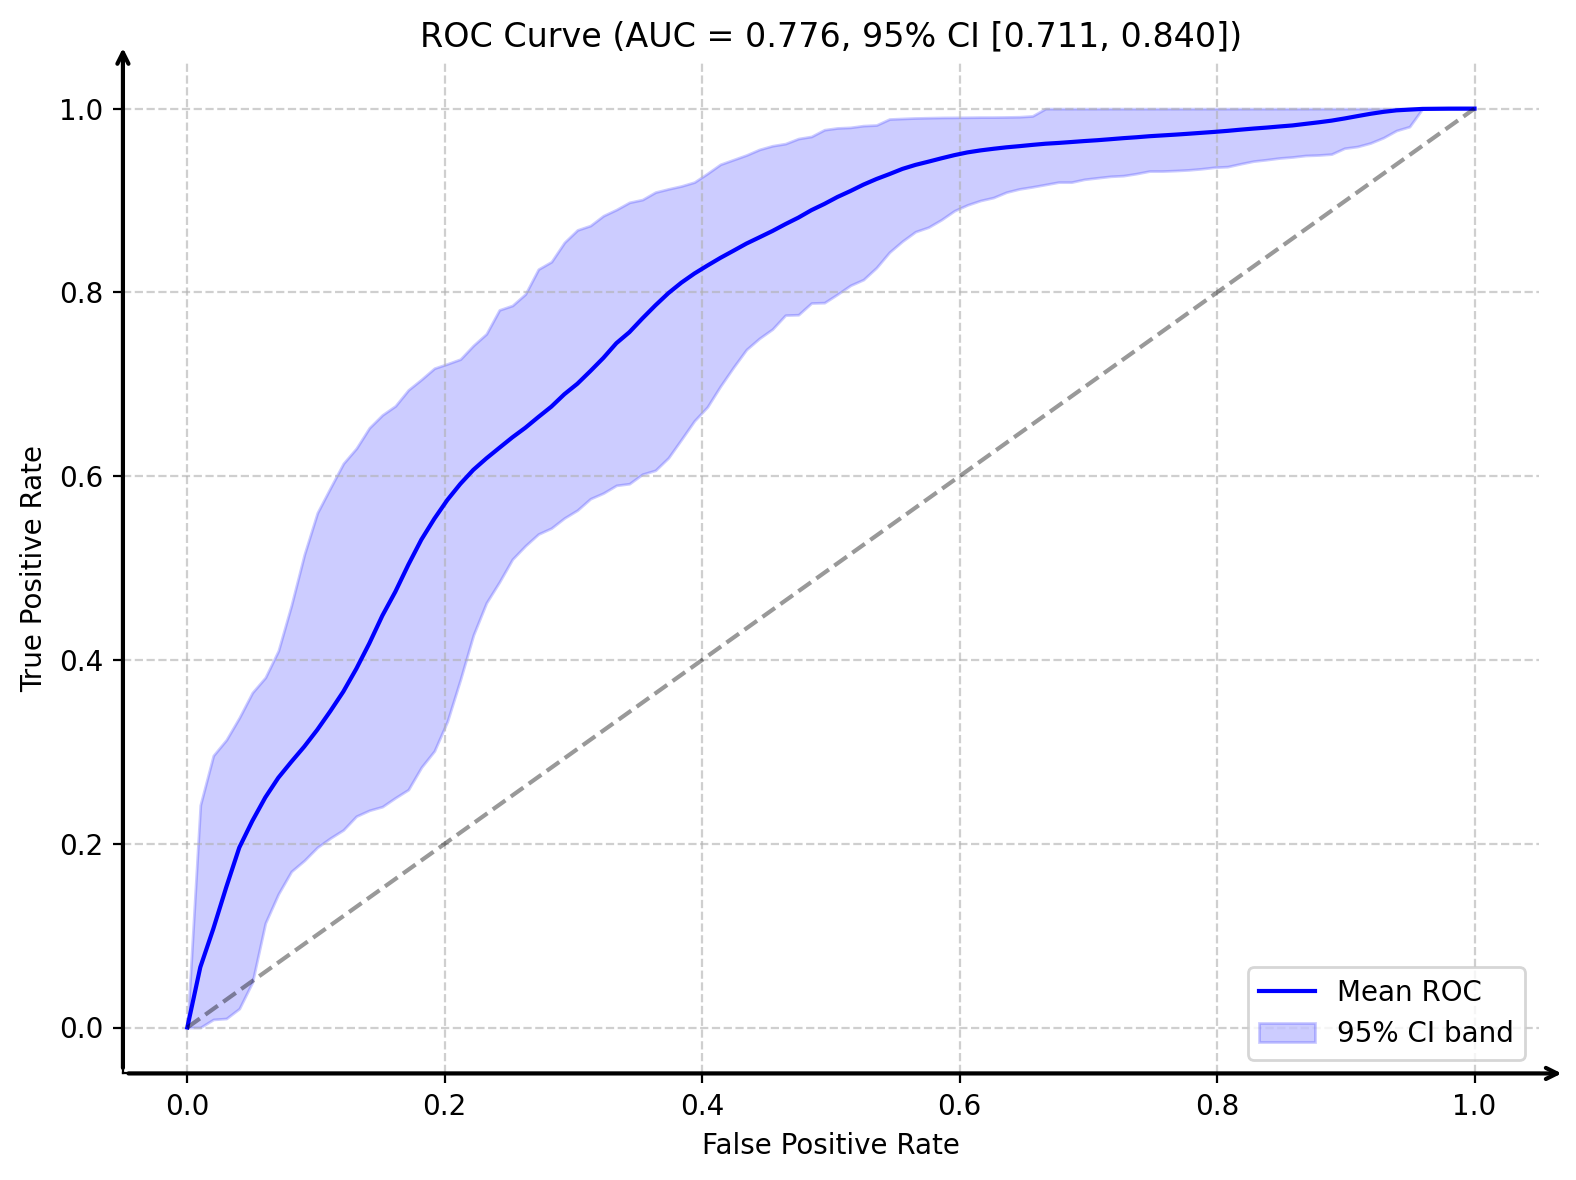

In [5]:
from roc_auc_ci import plot_roc_with_ci

plot_roc_with_ci(y_true, y_pred, save_path="testing_saving.png")